In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.chdir('C:/test/PRD')

os.listdir()

df = pd.read_csv('user_balance_table.csv',chunksize=2000)

df1 = df.get_chunk()

In [12]:
df1.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
2000,70,20140509,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2001,72,20140405,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2002,73,20140219,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2003,77,20140603,1314,1314,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2004,77,20140606,1314,1314,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [16]:
(df1['tBalance']==(df1['yBalance']+df1[
    'total_purchase_amt']-df1['total_redeem_amt'])).all()

True

In [20]:
(df1['total_redeem_amt']==df1['consume_amt']+df1['transfer_amt']).all()

True

In [21]:
(df1['consume_amt']==df1[
    'category1']+df1['category2']+df1['category3']+df1['category4']).all()

False

In [28]:
(df1['consume_amt']==0).sum()

1886

In [18]:
(df1['total_purchase_amt']==df1[
    'direct_purchase_amt']+df1['share_amt']).all()

True

In [19]:
(df1['direct_purchase_amt']==df1[
    'purchase_bal_amt']+df1['purchase_bank_amt']).all()

True

In [ ]:
columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19']

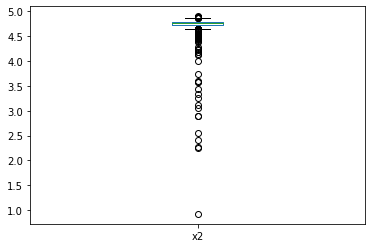

In [56]:
np.log1p(df.loc[df['x2']!=-1, 'x2']).plot.box()

In [51]:
df['x2'].value_counts().iloc[:10]

-1.00000      2277
 113.26762     191
 116.38791     162
 121.47262     155
 104.07555     146
 114.05388     135
 114.27912     123
 118.58282     118
 113.41933     113
 120.08366     111
Name: x2, dtype: int64

In [14]:
df.nunique()

uid    8000
x0      231
x1      404
x2     1649
x3      182
x4     6806
x5     5541
x6      173
x7     5096
x8      149
x9      224
x10     273
x11     202
x12     162
x13     135
x14     215
x15     133
x16    5113
x17     426
x18     126
x19    2174
y         2
dtype: int64

In [37]:
def get_counts(df, name):
    most_value = df[name].value_counts().idxmax()
    res = df.loc[df[name]!=most_value,'y'].value_counts()
    return res, most_value

In [32]:
df.columns

Index(['uid', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'y'],
      dtype='object')

In [38]:
columns = ['x8', 'x9','x10', 'x11', 'x12', 'x13', 'x14', 'x15']
for each in columns:
    print(get_counts(df, each)[0])

1    2633
0     640
Name: y, dtype: int64
1    5218
0    1957
Name: y, dtype: int64
1    592
0    138
Name: y, dtype: int64
1    646
0    144
Name: y, dtype: int64
1    161
0     27
Name: y, dtype: int64
1    5136
0    2051
Name: y, dtype: int64
1    5062
0    1913
Name: y, dtype: int64
1    3631
0    1494
Name: y, dtype: int64


(8000, 22)